# Description

This notebook helps to visualize some of the important features of the created dataset.

# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from configuration import Configuration
from os.path import join as path

# Configuration
c = Configuration()

## Load dataset

In [2]:
df = pd.read_parquet(path(c.path_dataset, "4-dataset", "dataset.parquet"), columns= ["TIME_LAST", c.app, c.org])
int_to_cls = c.load_mapping("int_to_cls")
df["APP"] = df[c.app].replace(int_to_cls) # Replace app id with app name

## How much data does one client have?

In [3]:
df["ORG_ID"].value_counts(sort=True)

ORG_ID
8     1855349
9     1544186
1     1404050
12     918311
4      580335
5      400757
13     309527
3      274884
7      266283
11     163131
14     109098
2       83609
10      76890
6       52295
Name: count, dtype: int64

## Application distribution between clients

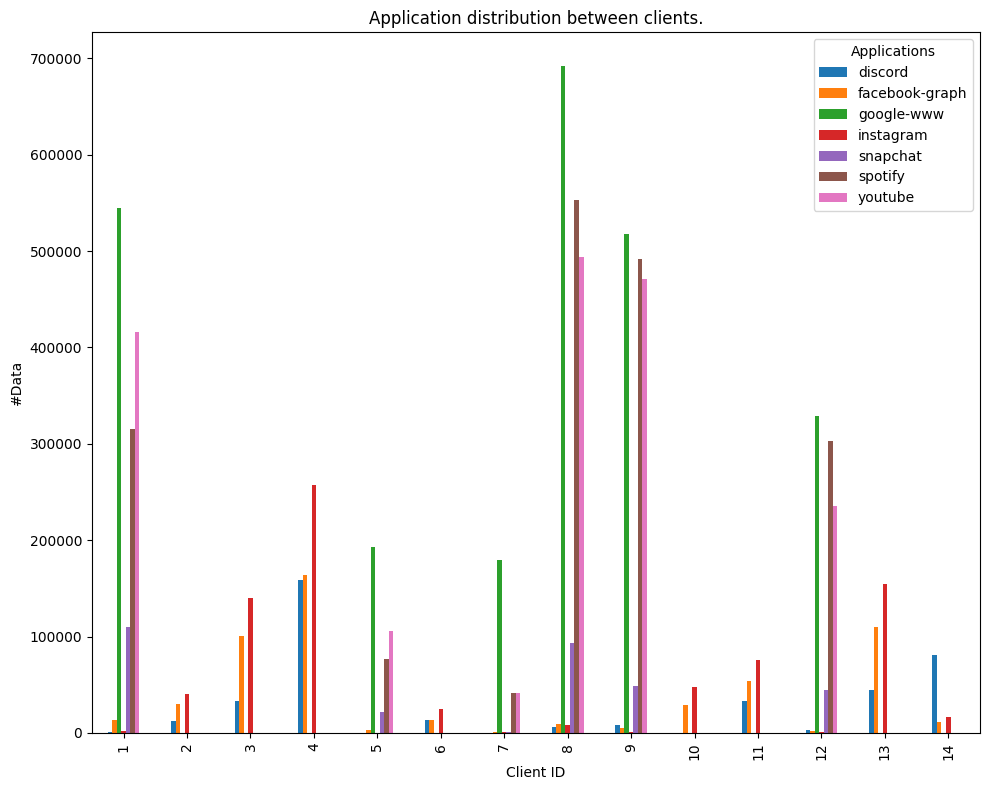

In [4]:
counts = df[["ORG_ID", "APP"]].value_counts().sort_index()
counts.unstack().plot(kind="bar", stacked=False, figsize=(10, 8))

plt.title("Application distribution between clients.")
plt.xlabel("Client ID")
plt.ylabel("#Data")
plt.legend(title="Applications")
plt.tight_layout()
plt.show()

## Network Traffic distribution in time between clients

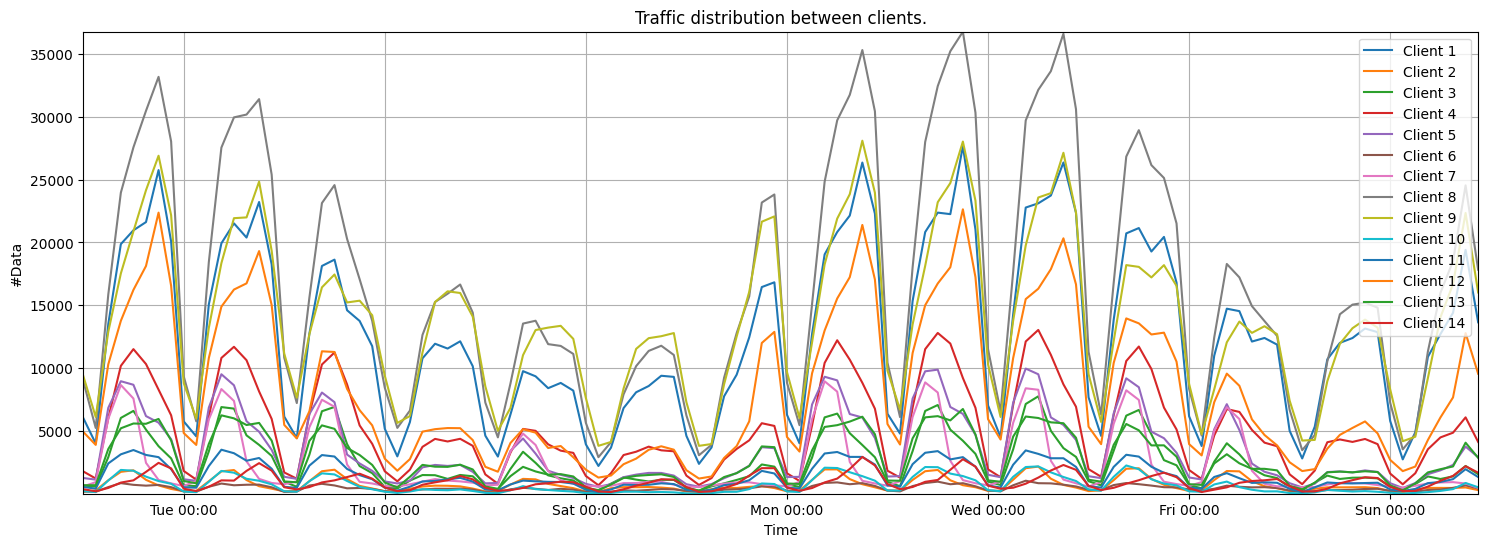

In [5]:
import pandas as pd

plt.figure(figsize=(18,6))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%a %H:%M'))

for org_id in range(1,14+1):
    
    df_org = df[df["ORG_ID"] == org_id]
    
    # Order by TIME_LAST timestamps.
    df_org.loc[:, 'TIME_LAST'] = pd.to_datetime(df_org['TIME_LAST'], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')
    df_org = df_org.dropna(subset=['TIME_LAST'])
    df_org = df_org.set_index('TIME_LAST')
    df_org = df_org.sort_values(by='TIME_LAST')

    # Rolling window with 3h window and 3h step.
    X = '3h'
    time_windows = df_org.resample(X).count()
    plt.plot(time_windows.index, time_windows.iloc[:, 0], label=f'Client {org_id}')

plt.xlabel("Time")
plt.ylabel("#Data")
plt.title(f"Traffic distribution between clients.")
plt.legend()
plt.grid()
plt.margins(0)
plt.show()

## Network Traffic distribution in time between applications

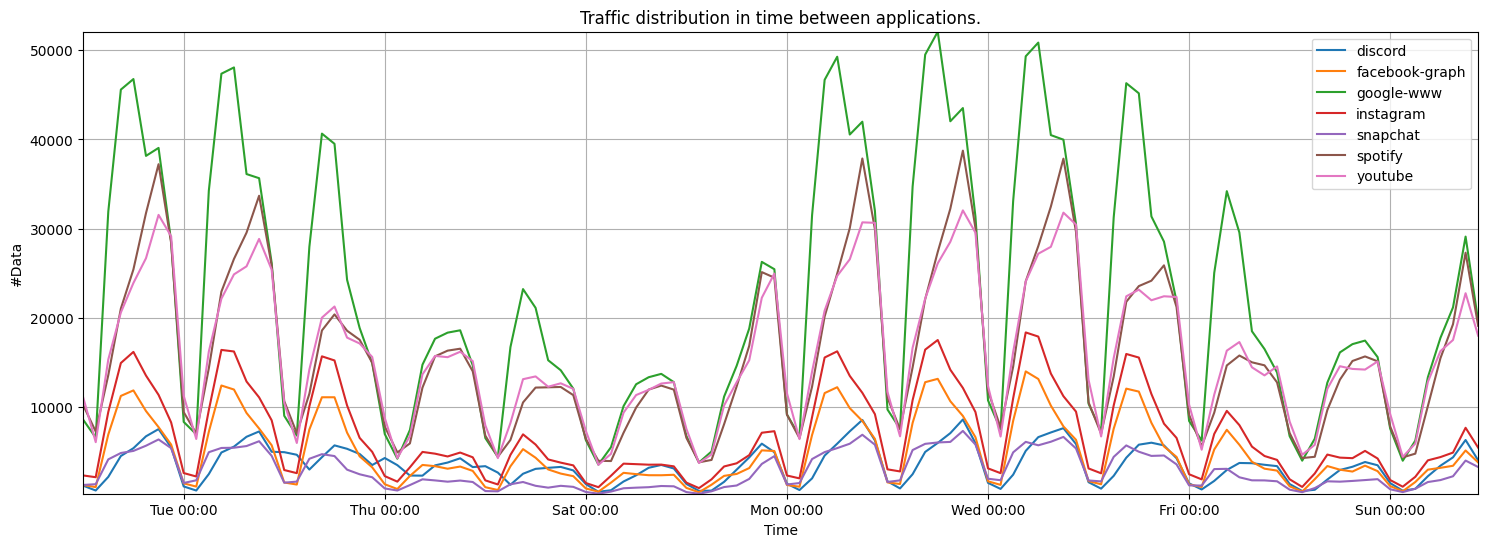

In [6]:
import pandas as pd

plt.figure(figsize=(18,6))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%a %H:%M'))

for app in int_to_cls.values():
    
    df_org = df[df["APP"] == app]
    
    # Order by TIME_LAST timestamps.
    df_org.loc[:, 'TIME_LAST'] = pd.to_datetime(df_org['TIME_LAST'], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')
    df_org = df_org.dropna(subset=['TIME_LAST'])
    df_org = df_org.set_index('TIME_LAST')
    df_org = df_org.sort_values(by='TIME_LAST')

    # Rolling window with 3h window and 3h step.
    X = '3h'
    time_windows = df_org.resample(X).count()
    plt.plot(time_windows.index, time_windows.iloc[:, 0], label=f'{app}')

plt.xlabel("Time")
plt.ylabel("#Data")
plt.title("Traffic distribution in time between applications.")
plt.legend()
plt.grid()
plt.margins(0)
plt.show()

## Other visualizations

-- Client and application correlations --

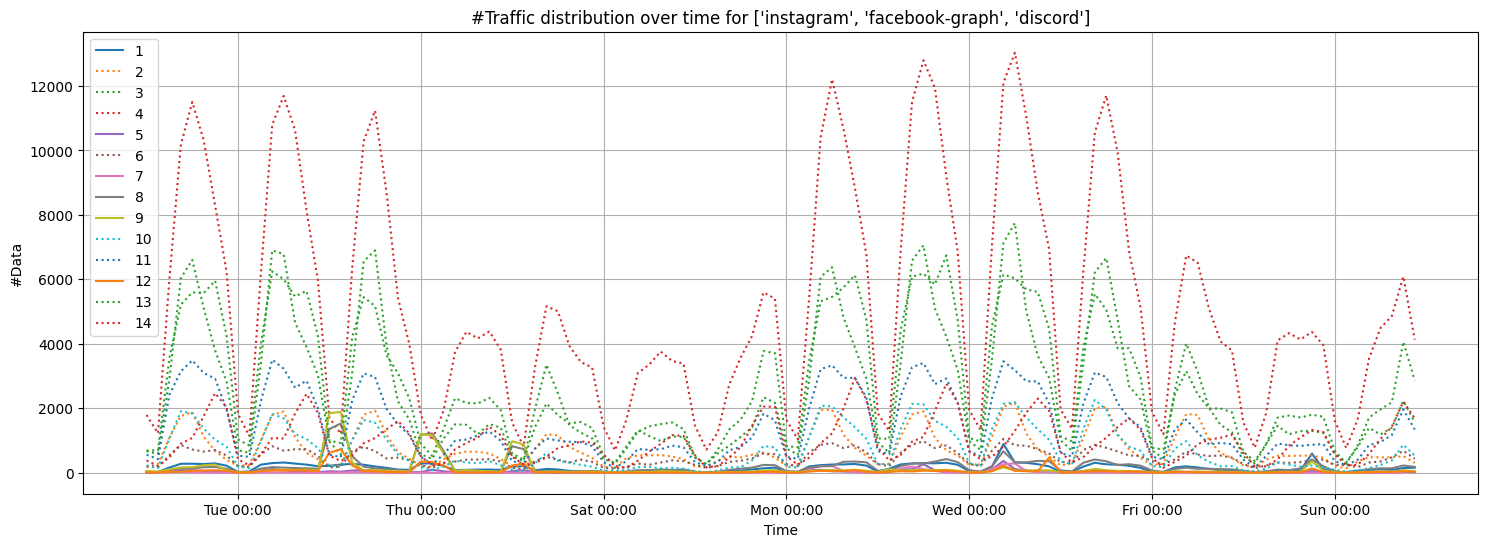

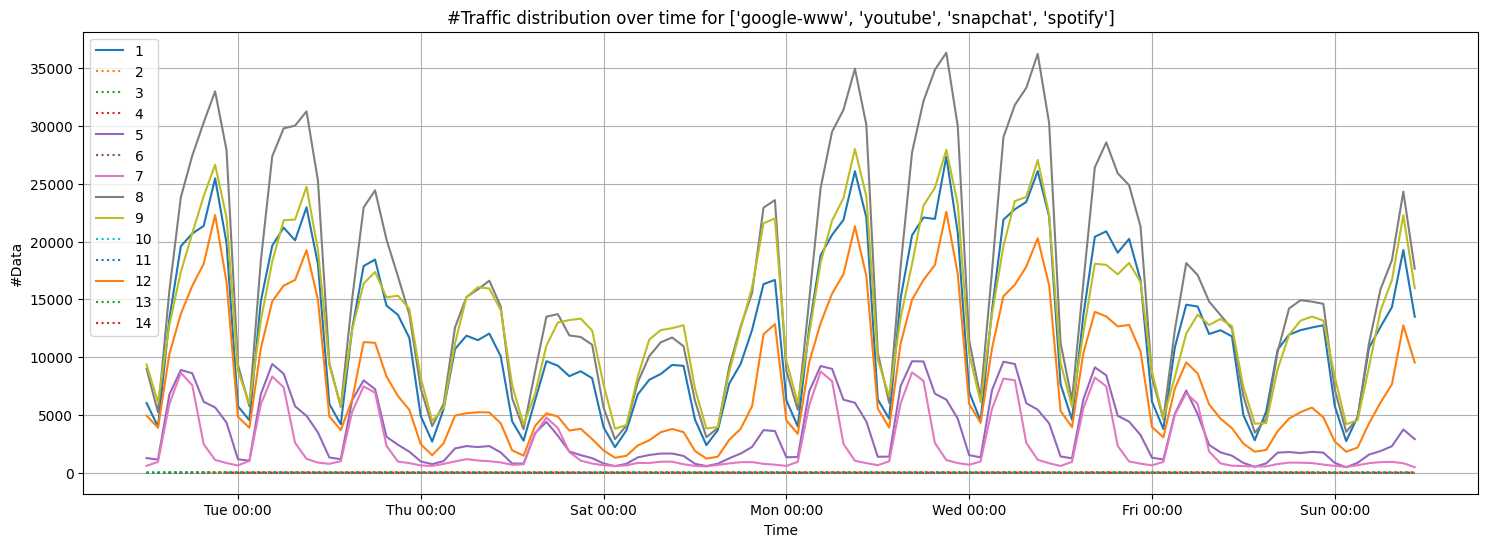

In [7]:
import pandas as pd

cluster_A = [ 1, 5 , 7, 8, 9, 12]

for apps in [["instagram", "facebook-graph", "discord"],["google-www", "youtube", "snapchat", "spotify"]]:
    plt.figure(figsize=(18,6))
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%a %H:%M'))
    for org_id in range(1,14+1):
    
        df_org_app = df[(df["APP"].isin(apps)) & (df["ORG_ID"] == org_id)]
        
        # Order by TIME_LAST timestamps.
        df_org_app.loc[:, 'TIME_LAST'] = pd.to_datetime(df_org_app['TIME_LAST'], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')
        df_org_app = df_org_app.dropna(subset=['TIME_LAST'])
        df_org_app = df_org_app.set_index('TIME_LAST')
        df_org_app = df_org_app.sort_values(by='TIME_LAST')

        X = '3h'

        time_windows = df_org_app.resample(X).count()
        

        if org_id in cluster_A:
            plt.plot(time_windows.index, time_windows.iloc[:, 0], linestyle="-", label=f'{org_id}')
        else:
            plt.plot(time_windows.index, time_windows.iloc[:, 0], linestyle=":", label=f'{org_id}')

        del time_windows, df_org_app

    plt.xlabel("Time")
    plt.ylabel("#Data")
    plt.title(f"#Traffic distribution over time for {apps}")
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()
    plt.close()

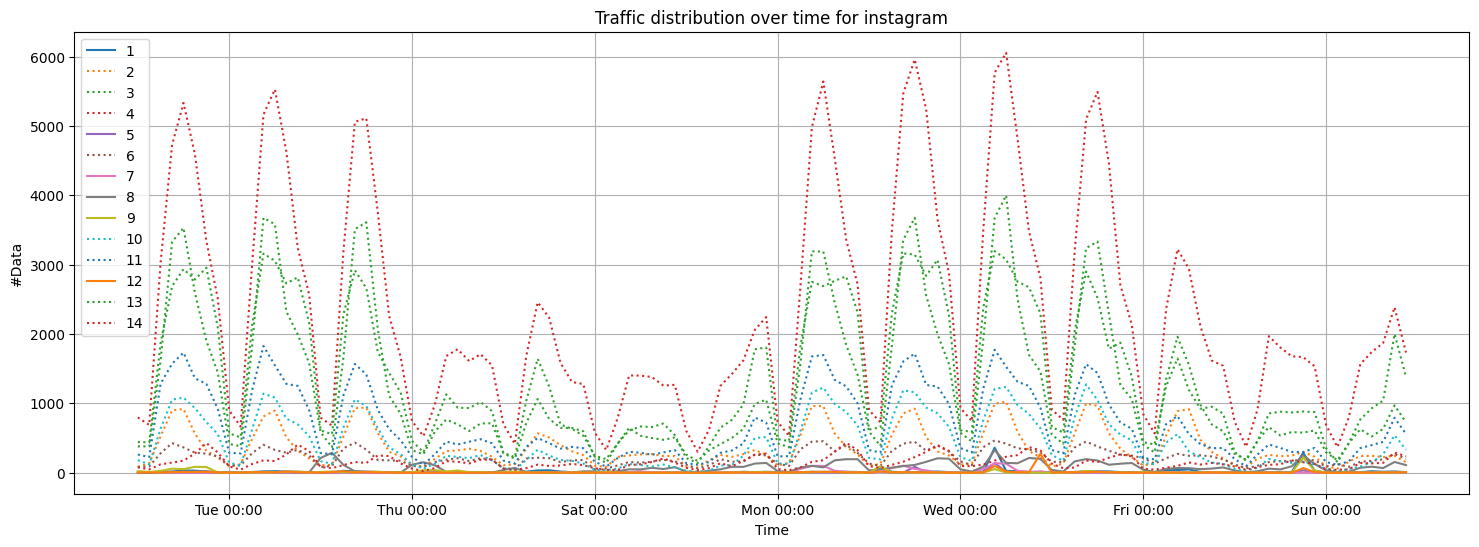

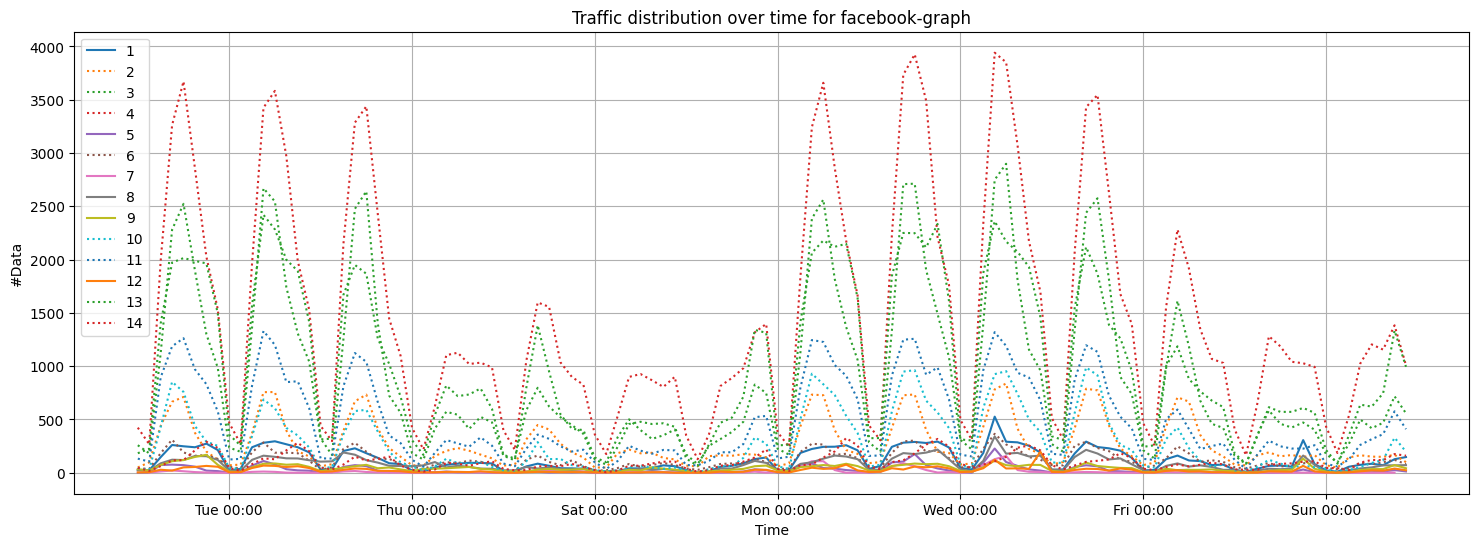

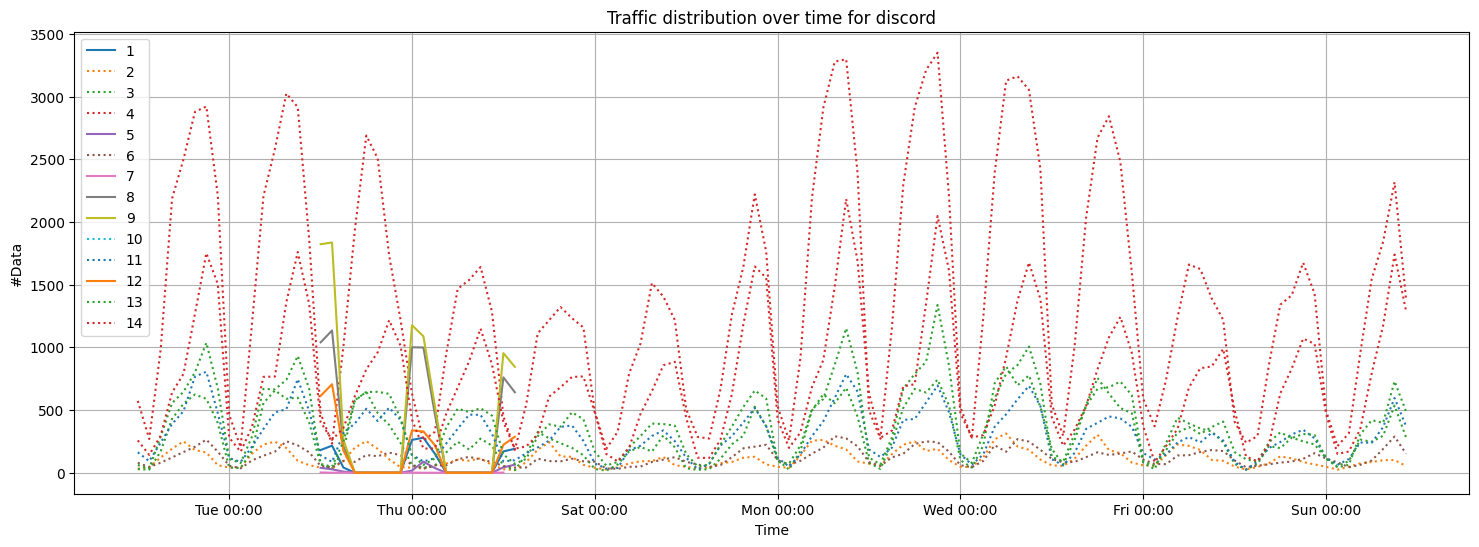

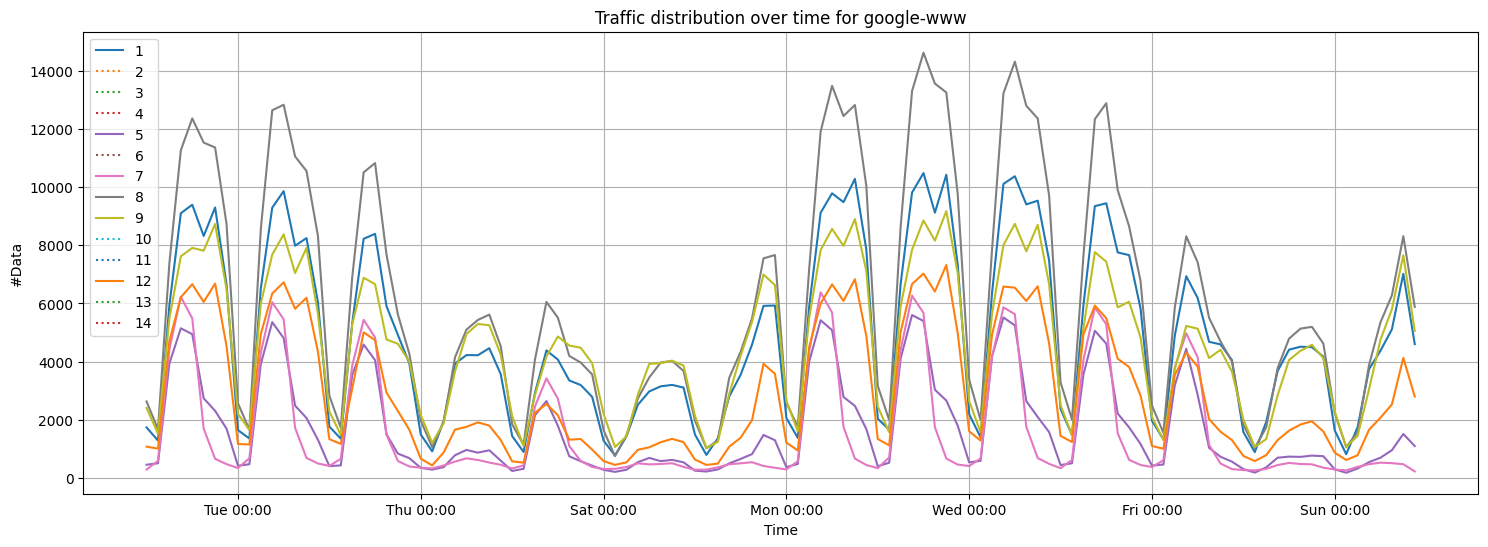

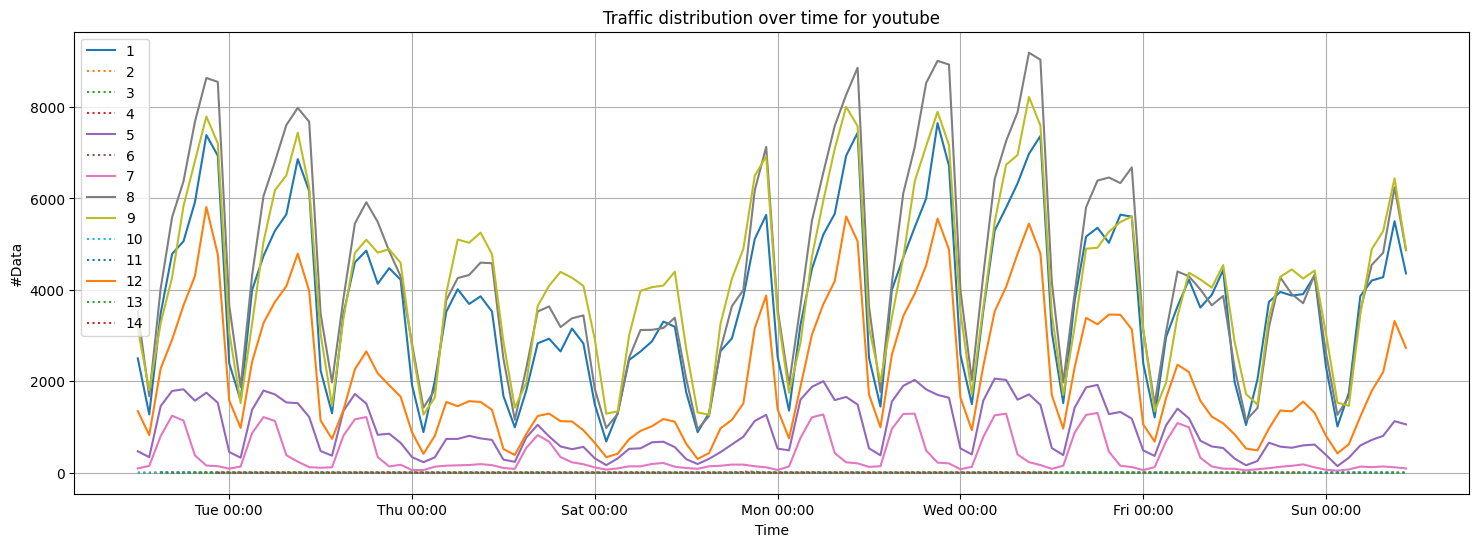

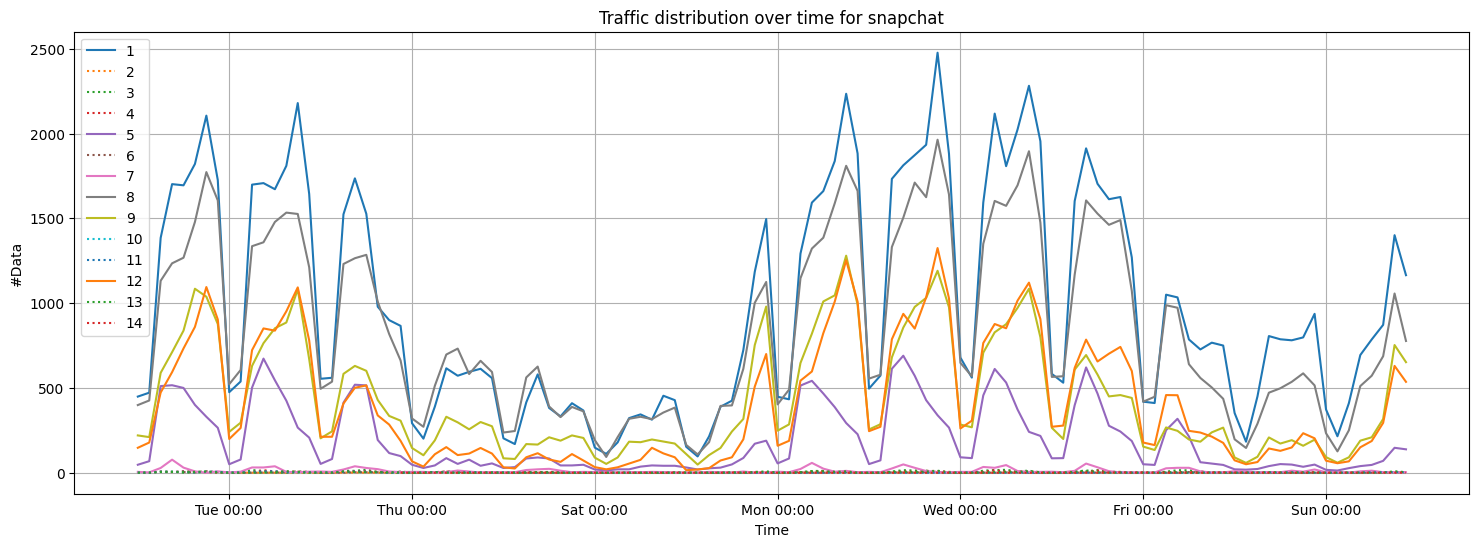

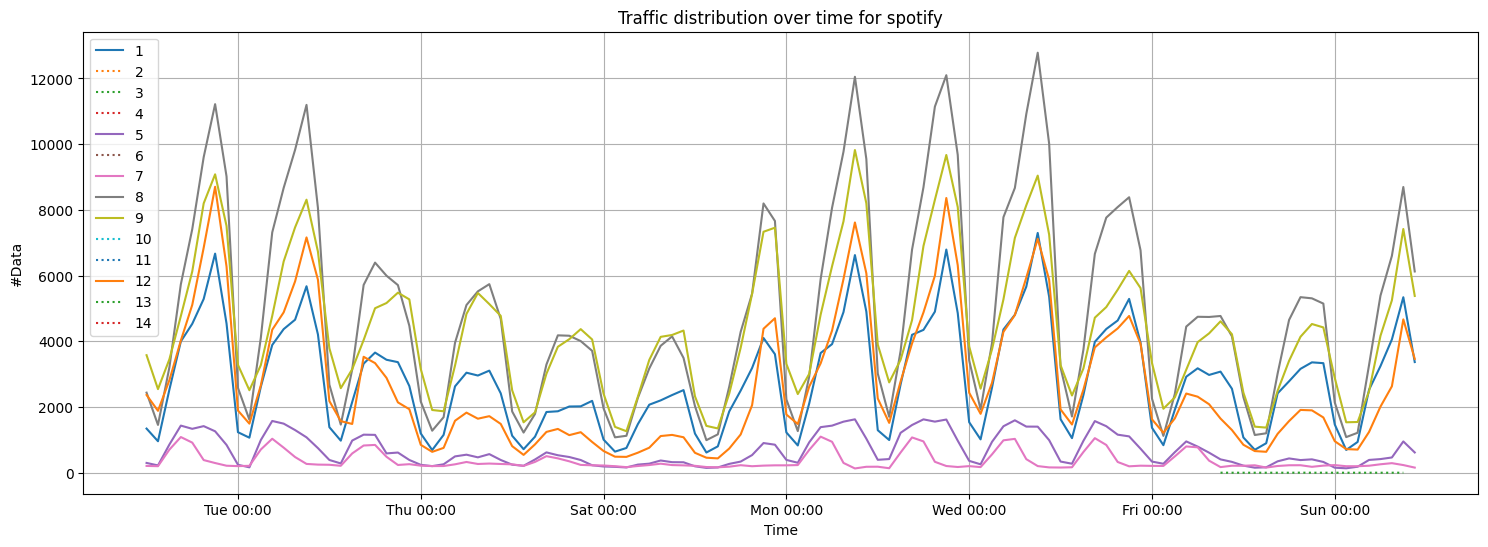

In [8]:
import pandas as pd

cluster_A = [ 1, 5 , 7, 8, 9, 12]

for app in ["instagram", "facebook-graph", "discord", "google-www", "youtube", "snapchat", "spotify"]:
    plt.figure(figsize=(18,6))
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%a %H:%M'))
    for org_id in range(1,14+1):
    
        df_org_app = df[(df["APP"] == app) & (df["ORG_ID"] == org_id)]
        
        # Order by TIME_LAST timestamps.
        df_org_app.loc[:, 'TIME_LAST'] = pd.to_datetime(df_org_app['TIME_LAST'], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')
        df_org_app = df_org_app.dropna(subset=['TIME_LAST'])
        df_org_app = df_org_app.set_index('TIME_LAST')
        df_org_app = df_org_app.sort_values(by='TIME_LAST')

        X = '3h'

        time_windows = df_org_app.resample(X).count()
        if org_id in cluster_A:
            plt.plot(time_windows.index, time_windows.iloc[:, 0], linestyle="-", label=f'{org_id}')
        else:
            plt.plot(time_windows.index, time_windows.iloc[:, 0], linestyle=":", label=f'{org_id}')

        del time_windows, df_org_app

    plt.xlabel("Time")
    plt.ylabel("#Data")
    plt.title(f"Traffic distribution over time for {app}")
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()
    plt.close()